In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from pycaret.utils import version
version()
from pycaret.time_series import TSForecastingExperiment
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima.arima.utils import nsdiffs, ndiffs
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.seasonal import STL
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pycaret.time_series import *



In [3]:
df_BTC = yf.download(
tickers = ["BTC-USD"],
start = "2020-01-01",
end = "2025-01-02"
)
# Rename columns to remove multi-level indexing
df_BTC.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df_BTC.shape
df_BTC.info()
print('Null Values:',df_BTC.isnull().values.sum())
print(df_BTC.columns)
df_BTC.reset_index(inplace=True)
df_BTC['Date'] = pd.to_datetime(df_BTC['Date'], format='%Y-%m-%d')
df_BTC = df_BTC[['Date', 'Close']]
df_BTC.head()
# Set the Date column as the index
df_BTC.set_index('Date', inplace=True)
print(df_BTC.index)
df_BTC = df_BTC.asfreq('D')  # Resample to daily frequency
# Verify the frequency of the index
print(f"Frequency of the index: {df_BTC.index.freq}")


[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1828 entries, 2020-01-01 to 2025-01-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1828 non-null   float64
 1   High    1828 non-null   float64
 2   Low     1828 non-null   float64
 3   Open    1828 non-null   float64
 4   Volume  1828 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 85.7 KB
Null Values: 0
Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2024-12-23', '2024-12-24', '2024-12-25', '2024-12-26',
               '2024-12-27', '2024-12-28', '2024-12-29', '2024-12-30',
               '2024-12-31', '2025-01-01'],
              dtype='datetime64[ns]', name='Date', length=1828, freq=None)
Frequency of the ind

In [4]:

exp_btc = TSForecastingExperiment()
exp_btc.setup(data=df_BTC, target='Close', fh=365, session_id=123,coverage=0.90)
exp_btc.check_stats()


Test   Test Name         Data             Property  \
0        Summary  Statistics  Transformed               Length   
1        Summary  Statistics  Transformed     # Missing Values   
2        Summary  Statistics  Transformed                 Mean   
3        Summary  Statistics  Transformed               Median   
4        Summary  Statistics  Transformed   Standard Deviation   
5        Summary  Statistics  Transformed             Variance   
6        Summary  Statistics  Transformed             Kurtosis   
7        Summary  Statistics  Transformed             Skewness   
8        Summary  Statistics  Transformed    # Distinct Values   
9    White Noise   Ljung-Box  Transformed       Test Statictic   
10   White Noise   Ljung-Box  Transformed       Test Statictic   
11   White Noise   Ljung-Box  Transformed              p-value   
12   White Noise   Ljung-Box  Transformed              p-value   
13   White Noise   Ljung-Box  Transformed          White Noise   
14   White Noise   Ljung-Box  Transformed          White Noise   
15  Stationarity         ADF  Transformed         Stationarity   
16  Stationarity         ADF  Transformed              p-value   
17  Stationarity         ADF  Transformed       Test Statistic   
18  Stationarity         ADF  Transformed    Critical Value 1%   
19  Stationarity         ADF  Transformed    Critical Value 5%   
20  Stationarity         ADF  Transformed   Critical Value 10%   
21  Stationarity        KPSS  Transformed   Trend Stationarity   
22  Stationarity        KPSS  Transformed              p-value   
23  Stationarity        KPSS  Transformed       Test Statistic   
24  Stationarity        KPSS  Transformed   Critical Value 10%   
25  Stationarity        KPSS  Transformed    Critical Value 5%   
26  Stationarity        KPSS  Transformed  Critical Value 2.5%   
27  Stationarity        KPSS  Transformed    Critical Value 1%   
28     Normality     Shapiro  Transformed            Normality   
29     Normality     Shapiro  Transformed              p-value   

                     Setting             Value  
0                                       1828.0  
1                                          0.0  
2                                 36349.146233  
3                                 32237.828125  
4                                 21157.704344  
5                             447648453.129209  
6                                     0.034563  
7                                      0.67212  
8                                       1828.0  
9   {'alpha': 0.05, 'K': 24}      39154.349847  
10  {'alpha': 0.05, 'K': 48}      68901.923236  
11  {'alpha': 0.05, 'K': 24}               0.0  
12  {'alpha': 0.05, 'K': 48}               0.0  
13  {'alpha': 0.05, 'K': 24}             False  
14  {'alpha': 0.05, 'K': 48}             False  
15           {'alpha': 0.05}             False  
16           {'alpha': 0.05}          0.888513  
17           {'alpha': 0.05}         -0.517715  
18           {'alpha': 0.05}         -3.433984  
19           {'alpha': 0.05}         -2.863145  
20           {'alpha': 0.05}         -2.567625  
21           {'alpha': 0.05}             False  
22           {'alpha': 0.05}              0.01  
23           {'alpha': 0.05}          0.683199  
24           {'alpha': 0.05}             0.119  
25           {'alpha': 0.05}             0.146  
26           {'alpha': 0.05}             0.176  
27           {'alpha': 0.05}             0.216  
28           {'alpha': 0.05}             False  
29           {'alpha': 0.05}               0.0

In [5]:
# Get the complete data used in the experiment
complete_data = exp_btc.get_config('y')  # Returns the entire target variable (time series)

# Extract training and test data based on 'fh' (forecast horizon)
fh = exp_btc.get_config('fh')  # Forecast horizon
train_data_btc = complete_data[:-fh[0]]  # Training data (everything except the last fh steps)
test_data_btc = complete_data[-fh[0]:]  # Test data (last fh steps)

# Access training and test sets from the configuration
y_train_btc = exp_btc.get_config('y_train')
y_test_btc = exp_btc.get_config('y_test')

# Print training and testing data
print("Training Data:")
print(y_train_btc)

print("\nTesting Data:")
print(y_test_btc)

Training Data:
Date
2020-01-01     7200.174316
2020-01-02     6985.470215
2020-01-03     7344.884277
2020-01-04     7410.656738
2020-01-05     7411.317383
                  ...     
2023-12-29    42099.402344
2023-12-30    42156.902344
2023-12-31    42265.187500
2024-01-01    44167.332031
2024-01-02    44957.968750
Freq: D, Name: Close, Length: 1463, dtype: float64

Testing Data:
Date
2024-01-03    42848.175781
2024-01-04    44179.921875
2024-01-05    44162.691406
2024-01-06    43989.195312
2024-01-07    43943.097656
                  ...     
2024-12-28    95163.929688
2024-12-29    93530.226562
2024-12-30    92643.210938
2024-12-31    93429.203125
2025-01-01    94419.757812
Freq: D, Name: Close, Length: 365, dtype: float64


In [6]:
exp_btc.models()

Name  \
ID                                                                   
naive                                             Naive Forecaster   
grand_means                                 Grand Means Forecaster   
snaive                                   Seasonal Naive Forecaster   
polytrend                              Polynomial Trend Forecaster   
arima                                                        ARIMA   
auto_arima                                              Auto ARIMA   
exp_smooth                                   Exponential Smoothing   
croston                                                    Croston   
ets                                                            ETS   
theta                                             Theta Forecaster   
tbats                                                        TBATS   
bats                                                          BATS   
lr_cds_dt               Linear w/ Cond. Deseasonalize & Detrending   
en_cds_dt          Elastic Net w/ Cond. Deseasonalize & Detrending   
ridge_cds_dt             Ridge w/ Cond. Deseasonalize & Detrending   
lasso_cds_dt             Lasso w/ Cond. Deseasonalize & Detrending   
lar_cds_dt       Least Angular Regressor w/ Cond. Deseasonalize...   
llar_cds_dt      Lasso Least Angular Regressor w/ Cond. Deseaso...   
br_cds_dt        Bayesian Ridge w/ Cond. Deseasonalize & Detren...   
huber_cds_dt             Huber w/ Cond. Deseasonalize & Detrending   
par_cds_dt       Passive Aggressive w/ Cond. Deseasonalize & De...   
omp_cds_dt       Orthogonal Matching Pursuit w/ Cond. Deseasona...   
knn_cds_dt         K Neighbors w/ Cond. Deseasonalize & Detrending   
dt_cds_dt        Decision Tree w/ Cond. Deseasonalize & Detrending   
rf_cds_dt        Random Forest w/ Cond. Deseasonalize & Detrending   
et_cds_dt          Extra Trees w/ Cond. Deseasonalize & Detrending   
gbr_cds_dt       Gradient Boosting w/ Cond. Deseasonalize & Det...   
ada_cds_dt            AdaBoost w/ Cond. Deseasonalize & Detrending   
lightgbm_cds_dt  Light Gradient Boosting w/ Cond. Deseasonalize...   

                                                         Reference  Turbo  
ID                                                                         
naive                     sktime.forecasting.naive.NaiveForecaster   True  
grand_means               sktime.forecasting.naive.NaiveForecaster   True  
snaive                    sktime.forecasting.naive.NaiveForecaster   True  
polytrend        sktime.forecasting.trend._polynomial_trend_for...   True  
arima                               sktime.forecasting.arima.ARIMA   True  
auto_arima                      sktime.forecasting.arima.AutoARIMA   True  
exp_smooth       sktime.forecasting.exp_smoothing.ExponentialSm...   True  
croston                         sktime.forecasting.croston.Croston   True  
ets                                 sktime.forecasting.ets.AutoETS   True  
theta                     sktime.forecasting.theta.ThetaForecaster   True  
tbats                               sktime.forecasting.tbats.TBATS  False  
bats                                  sktime.forecasting.bats.BATS  False  
lr_cds_dt        pycaret.containers.models.time_series.BaseCdsD...   True  
en_cds_dt        pycaret.containers.models.time_series.BaseCdsD...   True  
ridge_cds_dt     pycaret.containers.models.time_series.BaseCdsD...   True  
lasso_cds_dt     pycaret.containers.models.time_series.BaseCdsD...   True  
lar_cds_dt       pycaret.containers.models.time_series.BaseCdsD...   True  
llar_cds_dt      pycaret.containers.models.time_series.BaseCdsD...   True  
br_cds_dt        pycaret.containers.models.time_series.BaseCdsD...   True  
huber_cds_dt     pycaret.containers.models.time_series.BaseCdsD...   True  
par_cds_dt       pycaret.containers.models.time_series.BaseCdsD...   True  
omp_cds_dt       pycaret.containers.models.time_series.BaseCdsD...   True  
knn_cds_dt       pycaret.containers.models.time_series.BaseCdsD... 

In [7]:
#ETS model selection for BTC daily close price data

ses_btc = exp_btc.create_model('exp_smooth', trend=None, seasonal=None, sp= None, cross_validation=False )
#holt's linear 
ht_btc = exp_btc.create_model('exp_smooth', trend='add', seasonal=None, cross_validation=False)
#holt winters
hw_add_btc = exp_btc.create_model('exp_smooth', trend='add', seasonal='add', sp= 365, cross_validation=False)
hw_mult_btc = exp_btc.create_model('exp_smooth', trend='add', seasonal='mul', sp=365, cross_validation=False)
hw_damped_btc = exp_btc.create_model('exp_smooth', damped_trend='True' , trend='add', seasonal='mul', sp=365, cross_validation=False)
#------------
ets_ANN_btc = exp_btc.create_model('ets', error="add", trend=None, seasonal=None ,cross_validation=False ) # this is equivalent to point estimate of SES
ets_AAN_btc = exp_btc.create_model('ets', error="add", trend="add", seasonal=None ,cross_validation=False ) # this is equivalent to point estimate of Holt's Linear trend
ets_AAM_btc = exp_btc.create_model('ets', error="add", trend="add", seasonal="mul" ,cross_validation=False )
#------------
naive_btc = exp_btc.create_model('naive', cross_validation=False)
snaive_btc = exp_btc.create_model('snaive', cross_validation=False)



In [8]:
exp_btc.compare_models(include=[ ses_btc, ht_btc, hw_add_btc, hw_mult_btc, hw_damped_btc, ets_ANN_btc, ets_AAN_btc, ets_AAM_btc, naive_btc, snaive_btc, 'ets'], cross_validation=False)

ExponentialSmoothing(seasonal='add', sp=365, trend='add')

In [9]:

ets_auto_btc = exp_btc.create_model('ets', cross_validation=False)  # Auto ETS selection
tuned_ets_auto_btc = exp_btc.tune_model(ets_auto_btc)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.4s finished


In [26]:
exp_btc.compare_models(include=[ht_btc, hw_add_btc, tuned_ets_auto_btc], cross_validation=False) # Compare tuned Auto-ETS 

ExponentialSmoothing(seasonal='add', sp=365, trend='add')

hw_add_btc is the best model

In [10]:
# Debugging: Check the type and attributes of hw_add_btc
print(f"Type of hw_add_btc: {type(hw_add_btc)}")
print(f"Attributes and methods of hw_add_btc: {dir(hw_add_btc)}")

Type of hw_add_btc: <class 'sktime.forecasting.exp_smoothing.ExponentialSmoothing'>
Attributes and methods of hw_add_btc: ['_X', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__or__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__rpow__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_alias_params', '_check_X', '_check_X_y', '_check_fh', '_clone_flags', '_components', '_config', '_config_doc', '_config_dynamic', '_converter_store_y', '_cutoff', '_extract_conf_int', '_fh', '_fit', '_fit_forecaster', '_fitted_forecaster', '_fitted_param_names', '_forecaster', '_get_class_flag', '_get_class_flags', '_get_columns', '_get_fitted_param_names', '_get_fitted_params', '_get_fitted_params_default', '_get_flag', '_get_flags', '_get_ini

In [11]:

# Get in-sample predictions (TRYING _fitted_forecaster.fittedvalues for sktime)
in_sample_predictions_hw_add_btc = hw_add_btc._fitted_forecaster.fittedvalues

# Ensure the index of in-sample predictions matches the training data index
in_sample_predictions_hw_add_btc.index = exp_btc.get_config('y_train').index

# Print in-sample predictions
print("\nIn-sample predictions from Holts Linear model (hw_add_btc):")
print(in_sample_predictions_hw_add_btc)


In-sample predictions from Holts Linear model (hw_add_btc):
Date
2020-01-01     9897.500223
2020-01-02     7971.096912
2020-01-03     7901.539864
2020-01-04     7338.685348
2020-01-05     7063.844723
                  ...     
2023-12-29    42415.480594
2023-12-30    42881.832938
2023-12-31    41976.081387
2024-01-01    42909.249097
2024-01-02    44986.602149
Freq: D, Length: 1463, dtype: float64


In [13]:
# Ensure the index of in-sample predictions matches the training data index
in_sample_predictions_hw_add_btc.index = exp_btc.get_config('y_train').index

print("\nIn-sample predictions from Holt Winter method (hw_add_btc):")
print(in_sample_predictions_hw_add_btc)
if exp_btc.get_config('y_train').index.equals(in_sample_predictions_hw_add_btc.index):
    print("\nIndices are ALIGNED!")
else:
    print("\nIndices are NOT aligned (Warning!)")




In-sample predictions from Holt Winter method (hw_add_btc):
Date
2020-01-01     9897.500223
2020-01-02     7971.096912
2020-01-03     7901.539864
2020-01-04     7338.685348
2020-01-05     7063.844723
                  ...     
2023-12-29    42415.480594
2023-12-30    42881.832938
2023-12-31    41976.081387
2024-01-01    42909.249097
2024-01-02    44986.602149
Freq: D, Length: 1463, dtype: float64

Indices are ALIGNED!


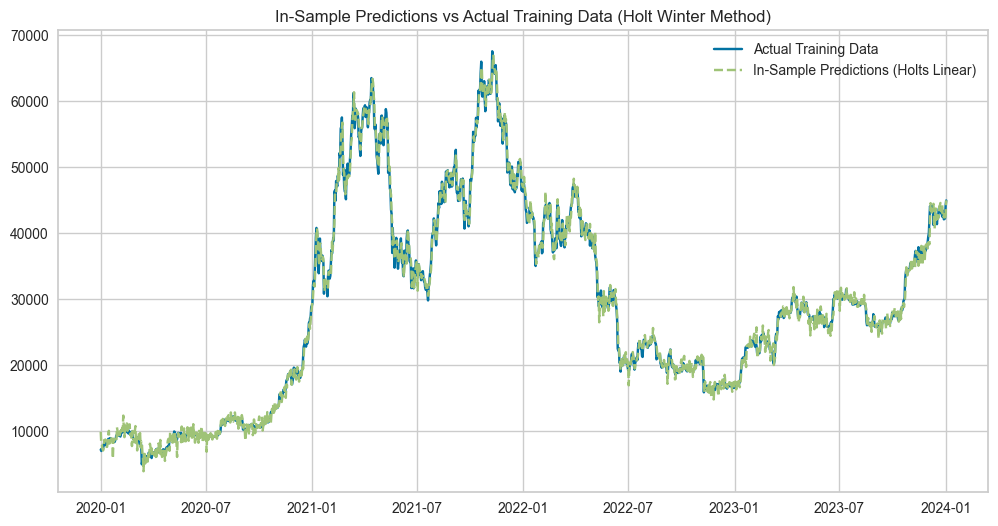

In [14]:
# Plotting in-sample predictions vs actual training data
plt.figure(figsize=(12, 6))

# Convert PeriodIndex to DatetimeIndex for plotting - ACTUAL DATA INDEX
actual_train_index_dt = exp_btc.get_config('y_train').index.to_timestamp()

# Convert PeriodIndex to DatetimeIndex for plotting - PREDICTION INDEX
prediction_index_dt = in_sample_predictions_hw_add_btc.index.to_timestamp()


plt.plot(actual_train_index_dt, exp_btc.get_config('y_train'), label='Actual Training Data')
plt.plot(prediction_index_dt, in_sample_predictions_hw_add_btc, label='In-Sample Predictions (Holts Linear)', linestyle='--')
plt.title('In-Sample Predictions vs Actual Training Data (Holt Winter Method)')
plt.legend()
plt.show()

In [15]:
# Calculate residuals: actual - predictions
residuals = train_data_btc - in_sample_predictions_hw_add_btc

# Print the first few residuals
print("\nFirst 10 residuals:")
print(residuals.head(10))



First 10 residuals:
Date
2020-01-01   -2697.325906
2020-01-02    -985.626697
2020-01-03    -556.655587
2020-01-04      71.971390
2020-01-05     347.472660
2020-01-06     430.732963
2020-01-07    -486.751871
2020-01-08    -471.464461
2020-01-09    -851.707689
2020-01-10     287.745649
Freq: D, dtype: float64


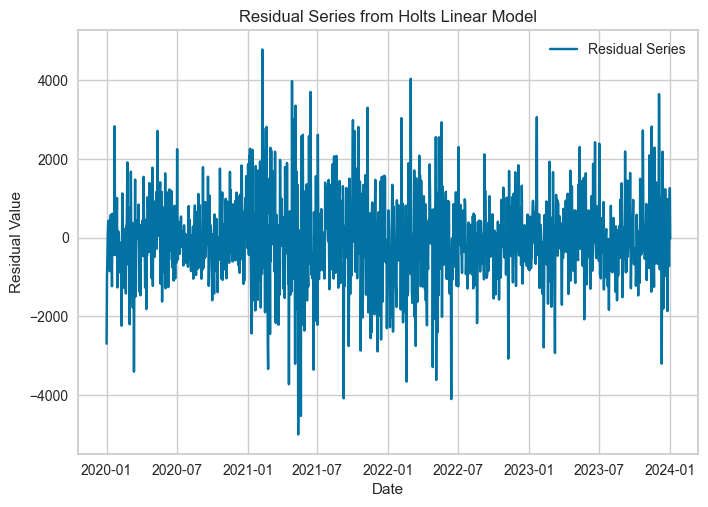

In [16]:
# Convert PeriodIndex to DatetimeIndex for plotting - RESIDUALS INDEX
residuals_index_dt = residuals.index.to_timestamp()

plt.plot(residuals_index_dt, residuals, label='Residual Series')
plt.title('Residual Series from Holts Linear Model')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.legend()
plt.show()

In [17]:
# Step 8: Perform Lag Selection using ACF on Residual Series
exp_btc.plot_model(plot='acf',  data_kwargs={'nlags': 50}) # Analyze ACF plot to choose lags


In [18]:
# Step 9: Normalize Residual Series (Min-Max Normalization)

from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler with feature_range from -1 to 1 (common for ANN)
scaler_residuals = MinMaxScaler(feature_range=(-1, 1))

# Fit the scaler on the residual series and transform it
normalized_residuals = scaler_residuals.fit_transform(residuals.values.reshape(-1, 1))

# Convert the normalized numpy array back to a pandas Series, with the original index
normalized_residuals = pd.Series(normalized_residuals.flatten(), index=residuals.index)

# Print the first few normalized residuals
print("\nFirst 10 Normalized Residuals:")
print(normalized_residuals.head(10))


First 10 Normalized Residuals:
Date
2020-01-01   -0.528353
2020-01-02   -0.178737
2020-01-03   -0.091120
2020-01-04    0.037278
2020-01-05    0.093549
2020-01-06    0.110555
2020-01-07   -0.076842
2020-01-08   -0.073719
2020-01-09   -0.151384
2020-01-10    0.081350
Freq: D, dtype: float64


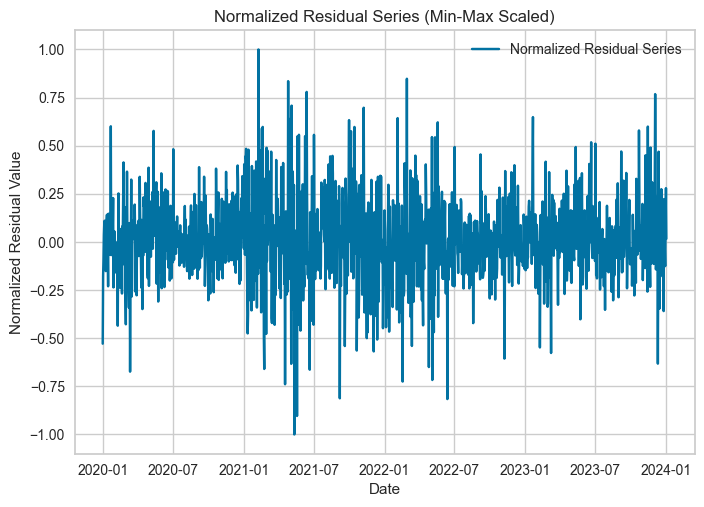

In [19]:
# --- Convert PeriodIndex to DatetimeIndex for plotting - NORMALIZED RESIDUALS INDEX ---
normalized_residuals_index_dt = normalized_residuals.index.to_timestamp()

plt.plot(normalized_residuals_index_dt, normalized_residuals, label='Normalized Residual Series')
plt.title('Normalized Residual Series (Min-Max Scaled)')
plt.xlabel('Date')
plt.ylabel('Normalized Residual Value')
plt.legend()
plt.show()


In [20]:
# --- Fill any remaining NaNs with 0 (Brute-Force NaN Handling - Before Lagging) ---
normalized_residuals.fillna(0, inplace=True) # FILL NANS WITH 0 HERE - NEW


In [21]:
# Step 10a: Prepare Data for ANN - Create Lagged Features and Target

def create_lagged_features(series, lags):
    """
    Creates lagged features from a time series.
    """
    lagged_features = {}
    for lag in lags:
        lagged_features[f'lag_{lag}'] = series.shift(lag)
    lagged_df = pd.DataFrame(lagged_features)
    return lagged_df # NO dropna() HERE ANYMORE

lags_to_use = [1, 7]  # Lags based on ACF analysis

lagged_residual_features = create_lagged_features(normalized_residuals, lags_to_use)
# --- Drop NaNs RIGHT AFTER FEATURE CREATION, BEFORE SPLITTING ---
lagged_residual_features.dropna(inplace=True) # Drop NaNs NOW 

residual_target = normalized_residuals.reindex(lagged_residual_features.index)

X_train_ann = lagged_residual_features
y_train_ann = residual_target

X_train_ann_np = X_train_ann.values
y_train_ann_np = y_train_ann.values

In [22]:
# --- Data Splitting for Validation ---
from sklearn.model_selection import train_test_split
X_train_ann_train, X_val_ann, y_train_ann_train, y_val_ann = train_test_split(
    X_train_ann, y_train_ann, test_size=0.2, shuffle=False
)

X_val_ann_np = X_val_ann.values # Convert VALIDATION sets to numpy arrays 
y_val_ann_np = y_val_ann.values # Convert VALIDATION sets to numpy arrays
X_train_ann_train_np = X_train_ann_train.values # Convert TRAIN sets to numpy arrays 
y_train_ann_train_np = y_train_ann_train.values # Convert TRAIN sets to numpy arrays 

# --- Ensure Data Types are float32 (Defensive Data Handling) ---
X_train_ann_train_np = X_train_ann_train_np.astype(np.float32) # Ensure float32 data type - NEW
X_val_ann_np = X_val_ann_np.astype(np.float32) # Ensure float32 data type - NEW
y_train_ann_train_np = y_train_ann_train_np.astype(np.float32) # Ensure float32 data type - NEW
y_val_ann_np = y_val_ann_np.astype(np.float32) # Ensure float32 data type - NEW

In [23]:
# --- Manual Tuning Loop Code Block ---

neuron_options = [25, 50, 100]
epochs_options = [30, 50, 70]
batch_size_options = [16, 32]

best_rmse = float('inf') 
best_params = None

for neurons in neuron_options:
    for epochs in epochs_options:
        for batch_size in batch_size_options:
            print(f"Trying: Neurons={neurons}, Epochs={epochs}, Batch Size={batch_size}")
            
            # Build ANN model (same as before, but using current hyperparameter values)
            ann_model = Sequential()
            ann_model.add(Dense(neurons, activation='relu', input_shape=(X_train_ann_train_np.shape[1],))) # Use _train_np shape
            ann_model.add(Dense(25, activation='relu'))
            ann_model.add(Dense(1))
            ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse') # Use legacy Adam optimizer - NEW
            
            # Train model (using *smaller* training set: X_train_ann_train_np, y_train_ann_train_np)
            ann_model.fit(X_train_ann_train_np, y_train_ann_train_np, epochs=epochs, batch_size=batch_size, verbose=0)
            
            # --- NaN Check 3: Right Before Prediction (Defensive Check) ---
            print(f"NaNs in X_val_ann_np BEFORE prediction: {np.isnan(X_val_ann_np).any()}") # ADDED CHECK AGAIN - RIGHT BEFORE PREDICT

            # Evaluate on VALIDATION set (using X_val_ann_np, y_val_ann_np - NO NaNs now)
            validation_predictions = ann_model.predict(X_val_ann_np).flatten() 
            rmse = np.sqrt(mean_squared_error(y_val_ann_np, validation_predictions)) 

            print(f"  Validation RMSE: {rmse:.4f}")

            if rmse < best_rmse: 
                best_rmse = rmse
                best_params = {'neurons': neurons, 'epochs': epochs, 'batch_size': batch_size}

print("\nBest Hyperparameters found (based on Validation RMSE):")
print(best_params)
print(f"Best Validation RMSE: {best_rmse:.4f}")

Trying: Neurons=25, Epochs=30, Batch Size=16


2025-03-09 11:08:11.821259: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 370us/step


  Validation RMSE: 0.0236
Trying: Neurons=25, Epochs=30, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 333us/step


  Validation RMSE: 0.0034
Trying: Neurons=25, Epochs=50, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 440us/step


  Validation RMSE: 0.0010
Trying: Neurons=25, Epochs=50, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 364us/step


  Validation RMSE: 0.0196
Trying: Neurons=25, Epochs=70, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 485us/step


  Validation RMSE: 0.0060
Trying: Neurons=25, Epochs=70, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 574us/step


  Validation RMSE: 0.0284
Trying: Neurons=50, Epochs=30, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 696us/step


  Validation RMSE: 0.0048
Trying: Neurons=50, Epochs=30, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 502us/step


  Validation RMSE: 0.0140
Trying: Neurons=50, Epochs=50, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 417us/step


  Validation RMSE: 0.0120
Trying: Neurons=50, Epochs=50, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 476us/step


  Validation RMSE: 0.0035
Trying: Neurons=50, Epochs=70, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 606us/step


  Validation RMSE: 0.0143
Trying: Neurons=50, Epochs=70, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 433us/step


  Validation RMSE: 0.0129
Trying: Neurons=100, Epochs=30, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 525us/step


  Validation RMSE: 0.0047
Trying: Neurons=100, Epochs=30, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 607us/step


  Validation RMSE: 0.0114
Trying: Neurons=100, Epochs=50, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 563us/step


  Validation RMSE: 0.0052
Trying: Neurons=100, Epochs=50, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 537us/step


  Validation RMSE: 0.0179
Trying: Neurons=100, Epochs=70, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 656us/step


  Validation RMSE: 0.0052
Trying: Neurons=100, Epochs=70, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 596us/step
  Validation RMSE: 0.0067

Best Hyperparameters found (based on Validation RMSE):
{'neurons': 25, 'epochs': 50, 'batch_size': 16}
Best Validation RMSE: 0.0010


In [24]:
# Best Hyperparameters from Tuning (replace with your best values if different)
best_neurons = 25
best_epochs = 50
best_batch_size = 16

# 1. Build the Final ANN Model with Best Hyperparameters
final_ann_model = Sequential()
final_ann_model.add(Dense(best_neurons, activation='relu', input_shape=(X_train_ann_np.shape[1],))) # Best neurons for layer 1
final_ann_model.add(Dense(25, activation='relu')) # You can keep layer 2 as before
final_ann_model.add(Dense(1))

# 2. Compile the Final ANN Model
optimizer = Adam(learning_rate=0.001) # You can keep learning rate as before, or tune it too
final_ann_model.compile(optimizer=optimizer, loss='mse')

# 3. Train the Final ANN Model (on FULL training data: X_train_ann_np, y_train_ann_np)
final_ann_model.fit(X_train_ann_np, y_train_ann_np, epochs=best_epochs, batch_size=best_batch_size, verbose=0) # Use best epochs, batch_size

# 4. Print Model Summary of the Final Model
final_ann_model.summary()

print("\nFinal ANN Model Retraining Complete (with Best Hyperparameters)!")

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 25)                75        
                                                                 
 dense_55 (Dense)            (None, 25)                650       
                                                                 
 dense_56 (Dense)            (None, 1)                 26        
                                                                 
Total params: 751
Trainable params: 751
Non-trainable params: 0
_________________________________________________________________

Final ANN Model Retraining Complete (with Best Hyperparameters)!



First 10 De-normalized In-Sample ANN Residual Predictions:
Date
2020-01-08   -257.878510
2020-01-09   -115.017914
2020-01-10    -90.280876
2020-01-11   -106.724998
2020-01-12    -97.947945
2020-01-13    -78.624702
2020-01-14   -156.700668
2020-01-15   -134.557190
2020-01-16    -41.982498
2020-01-17    -73.157677
Freq: D, dtype: float32


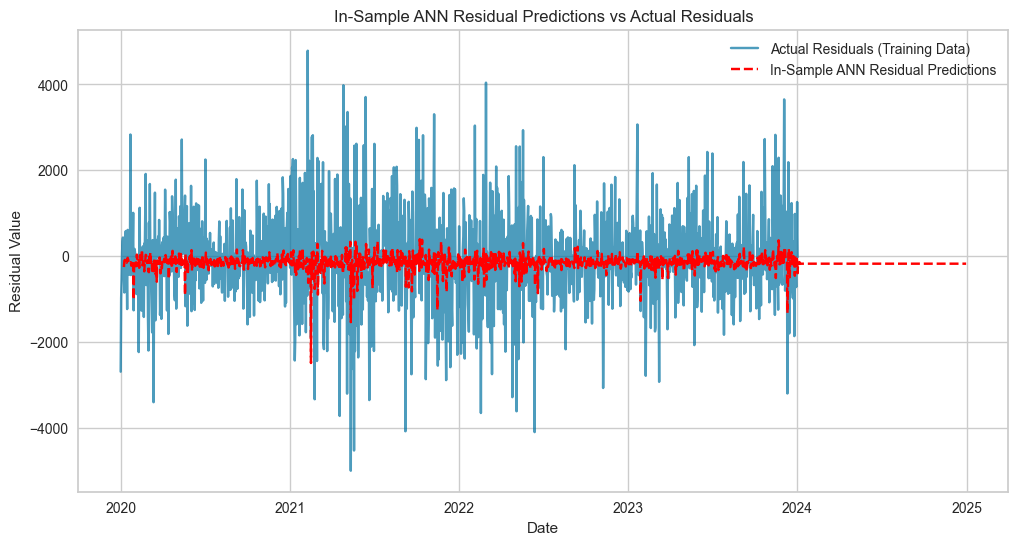

In [25]:
# Step 10 (Continued): Obtain In-Sample ANN Residual Predictions

# Use the trained final_ann_model to predict in-sample residuals

# 1. Prepare Input Features (already have X_train_ann_np from Step 10a)
#    X_train_ann_np (numpy array of lagged features for training data) is ready to use.

# 2. Generate In-Sample ANN Residual Predictions (Normalized)
ann_predictions_insample_normalized = final_ann_model.predict(X_train_ann_np, verbose=0).flatten()
ann_predictions_insample_normalized = pd.Series(ann_predictions_insample_normalized, index=X_train_ann.index)

# 3. De-normalize ANN Predictions (back to original residual scale)
ann_predictions_insample_denormalized = scaler_residuals.inverse_transform(ann_predictions_insample_normalized.values.reshape(-1, 1)).flatten()
ann_predictions_insample_denormalized = pd.Series(ann_predictions_insample_denormalized, index=ann_predictions_insample_normalized.index)

# 4. Print a sample of de-normalized in-sample ANN predictions
print("\nFirst 10 De-normalized In-Sample ANN Residual Predictions:")
print(ann_predictions_insample_denormalized.head(10))

# 5. Plotting In-Sample ANN Residual Predictions vs Actual Residuals (Optional)
plt.figure(figsize=(12, 6))
plt.plot(residuals.index.to_timestamp(), residuals, label='Actual Residuals (Training Data)', alpha=0.7) # Actual residuals
plt.plot(ann_predictions_insample_denormalized.index.to_timestamp(), ann_predictions_insample_denormalized, label='In-Sample ANN Residual Predictions', linestyle='--', color='red') # ANN predictions
plt.title('In-Sample ANN Residual Predictions vs Actual Residuals')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.legend()
plt.show()


First 10 De-normalized Hold-out ANN Residual Predictions:
Date
2024-01-03   -179.722336
2024-01-04   -197.959061
2024-01-05   -198.654312
2024-01-06   -198.680801
2024-01-07   -198.681854
2024-01-08   -198.681885
2024-01-09   -198.681870
2024-01-10   -196.102219
2024-01-11   -194.556015
2024-01-12   -194.576523
Freq: D, dtype: float32


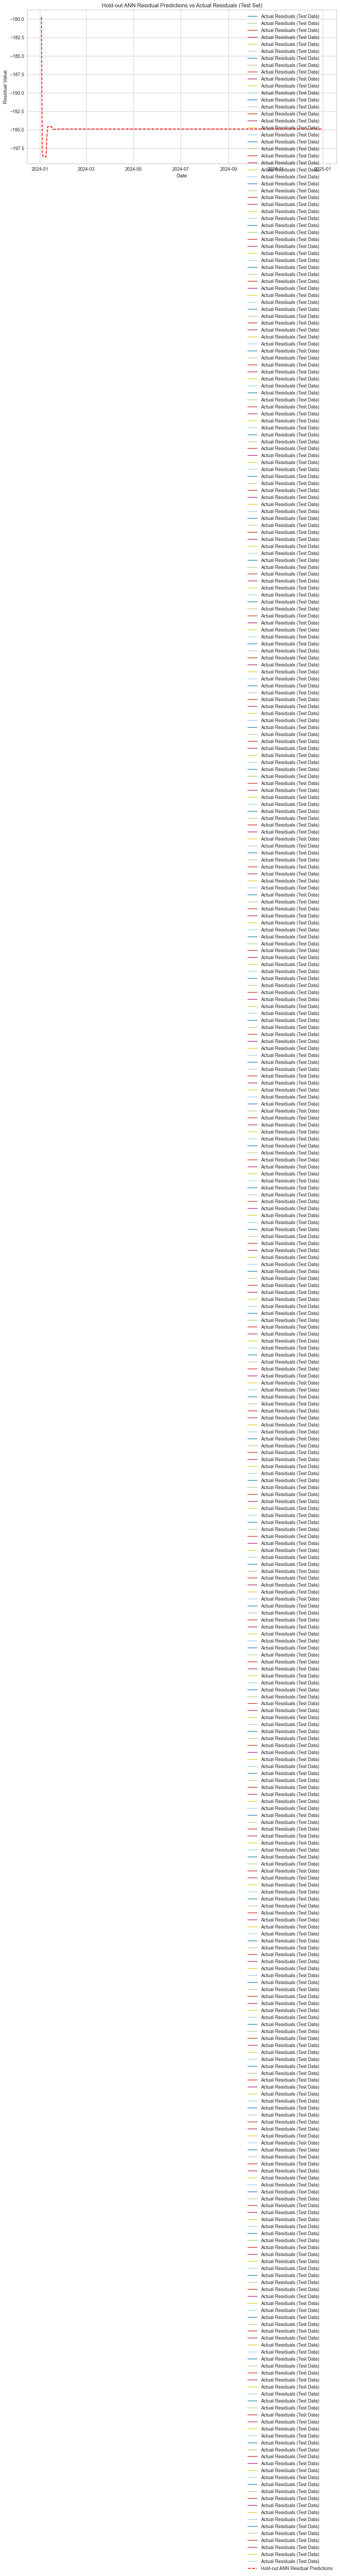

In [26]:
# Step 10 (Continued): Obtain Hold-out (Test Set) ANN Residual Predictions

# 1. Prepare for Iterative Forecast - Get last training residuals as initial history
last_train_residuals_normalized = normalized_residuals.tail(max(lags_to_use)).values # Last 'max_lag' residuals from training set (normalized)
ann_predictions_holdout_normalized = [] # List to store forecasted normalized residuals for hold-out period
current_residuals_history = list(last_train_residuals_normalized) # Initialize history with last training residuals

# 2. Iterative (Recursive) Forecast Loop - for each step in forecast horizon (fh)
forecast_horizon = len(exp_btc.get_config('y_test')) # Length of forecast horizon (test set)

for _ in range(forecast_horizon): # Iterate for each step in forecast horizon
    
    # a. Create feature vector from current residual history
    feature_vector = np.array([current_residuals_history[-lag] for lag in lags_to_use]).reshape(1, -1) # Get lagged residuals from history
    
    # b. Predict next residual (normalized) using trained ANN model
    next_residual_normalized = final_ann_model.predict(feature_vector, verbose=0).flatten()[0] # Predict 1 step ahead
    ann_predictions_holdout_normalized.append(next_residual_normalized) # Append prediction to forecast list
    
    # c. Update residual history for next iteration - append predicted residual and remove oldest
    current_residuals_history.append(next_residual_normalized) # Append PREDICTED residual to history
    current_residuals_history.pop(0) # Remove the oldest residual from history (to keep history length constant)

# 3. Convert ANN Hold-out Predictions to Pandas Series with Test Set Index
ann_predictions_holdout_normalized = pd.Series(ann_predictions_holdout_normalized, index=exp_btc.get_config('y_test').index)

# 4. De-normalize ANN Hold-out Predictions (back to original residual scale)
ann_predictions_holdout_denormalized = scaler_residuals.inverse_transform(np.array(ann_predictions_holdout_normalized).reshape(-1, 1)).flatten()
ann_predictions_holdout_denormalized = pd.Series(ann_predictions_holdout_denormalized, index=ann_predictions_holdout_normalized.index)

# 5. Print sample of de-normalized hold-out ANN residual predictions
print("\nFirst 10 De-normalized Hold-out ANN Residual Predictions:")
print(ann_predictions_holdout_denormalized.head(10))

# --- Step: Obtain ETS Hold-out Predictions (for plotting) ---
ets_predictions_holdout = exp_btc.predict_model(hw_mult_btc)

# Ensure the index of ETS hold-out predictions is a DatetimeIndex for plotting
if isinstance(ets_predictions_holdout.index, pd.PeriodIndex):
    ets_predictions_holdout.index = ets_predictions_holdout.index.to_timestamp()

# 6. Plotting Hold-out ANN Residual Predictions vs Actual Residuals (Test Set) - Optional
plt.figure(figsize=(12, 6))
plt.plot(exp_btc.get_config('y_test').index.to_timestamp(), exp_btc.get_config('y_test') - ets_predictions_holdout, label='Actual Residuals (Test Data)', alpha=0.7) # Actual test residuals (calculated)
plt.plot(ann_predictions_holdout_denormalized.index.to_timestamp(), ann_predictions_holdout_denormalized, label='Hold-out ANN Residual Predictions', linestyle='--', color='red') # ANN holdout predictions
plt.title('Hold-out ANN Residual Predictions vs Actual Residuals (Test Set)')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.legend()
plt.show()

In [27]:
# --- Insert this code block to replace the original summary statistics printing ---

# Print summary statistics (min, max, mean, std) for actual test residuals
y_test_btc_datetime_index = y_test_btc.copy() # Create a copy to avoid modifying original y_test_btc
y_test_btc_datetime_index.index = y_test_btc_datetime_index.index.to_timestamp() # Convert PeriodIndex to DatetimeIndex

actual_test_residuals_series = y_test_btc_datetime_index - ets_predictions_holdout['y_pred'] # Use y_test_btc_datetime_index here

print("\nSummary Statistics - Actual Test Set Residuals (DatetimeIndex):")
print(actual_test_residuals_series.describe())

# Print summary statistics for de-normalized ANN hold-out predictions (no change needed here)
print("\nSummary Statistics - De-normalized ANN Hold-out Predictions:")
print(ann_predictions_holdout_denormalized.describe())


Summary Statistics - Actual Test Set Residuals (DatetimeIndex):
count      365.000000
mean     10162.999207
std      12656.870166
min     -10996.564194
25%        968.990406
50%       7735.321656
75%      16874.386531
max      45310.141850
dtype: float64

Summary Statistics - De-normalized ANN Hold-out Predictions:
count    365.000000
mean    -194.920883
std        0.927265
min     -198.681885
25%     -194.904465
50%     -194.904465
75%     -194.904465
max     -179.722336
dtype: float64


In [28]:
print("\nHead of ets_predictions_holdout DataFrame:")
print(ets_predictions_holdout.head())
print("\nInfo of ets_predictions_holdout DataFrame:")
ets_predictions_holdout.info()


Head of ets_predictions_holdout DataFrame:
                y_pred
2024-01-03  45019.1517
2024-01-04  44552.1215
2024-01-05  44758.3365
2024-01-06  46170.2400
2024-01-07  46922.4101

Info of ets_predictions_holdout DataFrame:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2024-01-03 to 2025-01-01
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y_pred  365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [29]:
print("\nHead of y_test_btc DataFrame:")
print(y_test_btc.head())
print("\nInfo of y_test_btc DataFrame:")
y_test_btc.info()



Head of y_test_btc DataFrame:
Date
2024-01-03    42848.175781
2024-01-04    44179.921875
2024-01-05    44162.691406
2024-01-06    43989.195312
2024-01-07    43943.097656
Freq: D, Name: Close, dtype: float64

Info of y_test_btc DataFrame:
<class 'pandas.core.series.Series'>
PeriodIndex: 365 entries, 2024-01-03 to 2025-01-01
Freq: D
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [30]:
# Re-run Step 5b: Obtain Hold-out (Test Set) Predictions from Best ETS Model
ets_predictions_holdout = exp_btc.predict_model(hw_add_btc) 

In [37]:
print("Test Data BTC Head:")
print(test_data_btc.head())

print("\nETS Predictions Holdout Head:")
print(ets_predictions_holdout.head())

Test Data BTC Head:
                   Close
Date                    
2025-01-01  94419.757812

ETS Predictions Holdout Head:
                y_pred
2024-01-03  44924.2809
2024-01-04  44574.1519
2024-01-05  44509.0693
2024-01-06  45401.2621
2024-01-07  45762.9775


In [40]:
# Calculate residuals: actual - predictions
residuals = train_data_btc - in_sample_predictions_hw_add_btc 


In [41]:
# --- Step 12: Combine ETS and ANN Predictions for Final Hybrid Forecasts ---

# Get ETS hold-out predictions (if you haven't already calculated them)
ets_predictions_holdout = exp_btc.predict_model(hw_add_btc)

# Combine ETS predictions and ANN residual predictions for final hybrid hold-out forecasts
final_predictions_holdout_hybrid = ets_predictions_holdout['y_pred'] + ann_predictions_holdout_denormalized

# Print the first few final hybrid hold-out forecasts
print("\nFirst 10 Final Hybrid Hold-out Forecasts:")
print(final_predictions_holdout_hybrid.head(10))


First 10 Final Hybrid Hold-out Forecasts:
2024-01-03    44744.558564
2024-01-04    44376.192839
2024-01-05    44310.414988
2024-01-06    45202.581299
2024-01-07    45564.295646
2024-01-08    46189.914915
2024-01-09    46149.243630
2024-01-10    45617.921581
2024-01-11    45203.186385
2024-01-12    45416.041477
Freq: D, dtype: float64


In [42]:
def ts_metrics(y, y_hat):
    """
    Calculate and display time series evaluation metrics.
    
    Parameters:
    y (array-like): Actual values
    y_hat (array-like): Predicted values
    
    Returns:
    dict: A dictionary containing all calculated metrics
    """
    # Calculate metrics
    mae = mean_absolute_error(y, y_hat)
    mape = mean_absolute_percentage_error(y, y_hat)
    rmse = np.sqrt(mean_squared_error(y, y_hat))
    r2 = r2_score(y, y_hat)
    
    
    # Store metrics in a dictionary
    metrics = {
        'MAE': mae,
        'MAPE': mape,
        'RMSE': rmse,
        'R2': r2,
    }
    
    # Print metrics with descriptions
    print("Time Series Model Evaluation Metrics:")
    print("-" * 40)
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.4%}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R²): {r2:.4f}")
    
    return 

In [44]:
# --- Step 13: Evaluate Hybrid Model Performance on Hold-out Set ---
print("\n--- Hybrid Model Evaluation Metrics (Hold-out Set) ---")
ts_metrics(exp_btc.get_config('y_test'), final_predictions_holdout_hybrid) # Use ts_metrics function to evaluate




--- Hybrid Model Evaluation Metrics (Hold-out Set) ---
Time Series Model Evaluation Metrics:
----------------------------------------
Mean Absolute Error (MAE): 10663.1178
Mean Absolute Percentage Error (MAPE): 14.3779%
Root Mean Squared Error (RMSE): 14561.6305
R-squared (R²): 0.0149


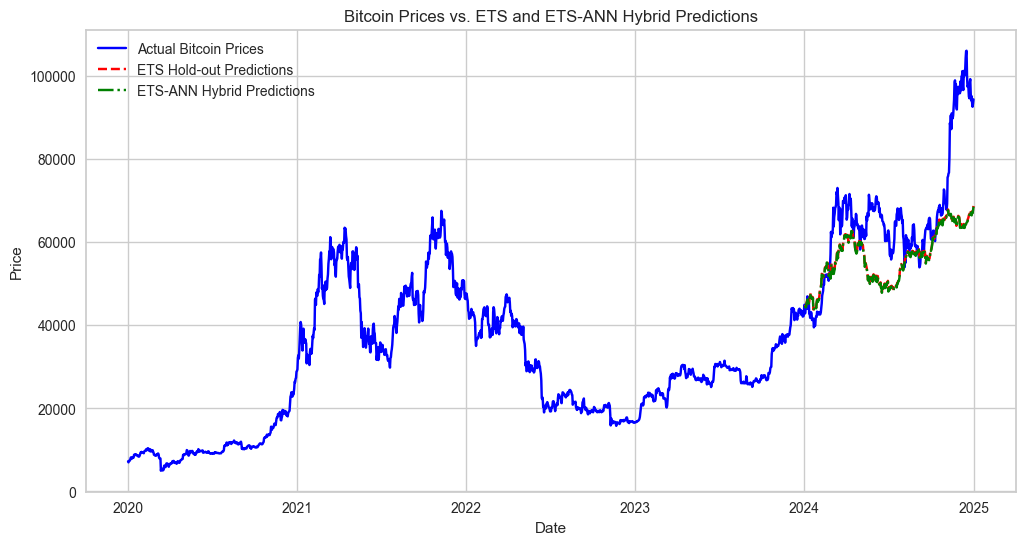

In [50]:
# Ensure correct index type for plotting
if isinstance(df_BTC.index, pd.PeriodIndex):
    df_BTC.index = df_BTC.index.to_timestamp()

if isinstance(ets_predictions_holdout.index, pd.PeriodIndex):
    ets_predictions_holdout.index = ets_predictions_holdout.index.to_timestamp()

# Ensure df_BTC is a DataFrame and contains the 'Close' column
if isinstance(df_BTC, pd.Series):
    df_BTC = df_BTC.to_frame(name='Close')

plt.figure(figsize=(12, 6))

# Plot Actual Bitcoin Prices (Full Data)
if isinstance(df_BTC, pd.DataFrame) and 'Close' in df_BTC.columns:
    plt.plot(df_BTC.index, df_BTC['Close'], label='Actual Bitcoin Prices', color='blue')
else:
    print("Error: 'Close' column not found in df_BTC DataFrame")

# Plot ETS Hold-out Predictions
if isinstance(ets_predictions_holdout, pd.DataFrame) and 'y_pred' in ets_predictions_holdout.columns:
    plt.plot(ets_predictions_holdout.index, ets_predictions_holdout['y_pred'], label='ETS Hold-out Predictions', color='red', linestyle='--')
else:
    print("Error: 'y_pred' column not found in ets_predictions_holdout DataFrame")

# Plot ETS-ANN Hybrid Predictions
if isinstance(final_predictions_holdout_hybrid, pd.Series):
    plt.plot(final_predictions_holdout_hybrid.index, final_predictions_holdout_hybrid, label='ETS-ANN Hybrid Predictions', color='green', linestyle='-.')
else:
    print("Error: final_predictions_holdout_hybrid is not a Series")

plt.title('Bitcoin Prices vs. ETS and ETS-ANN Hybrid Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 800x550 with 0 Axes>

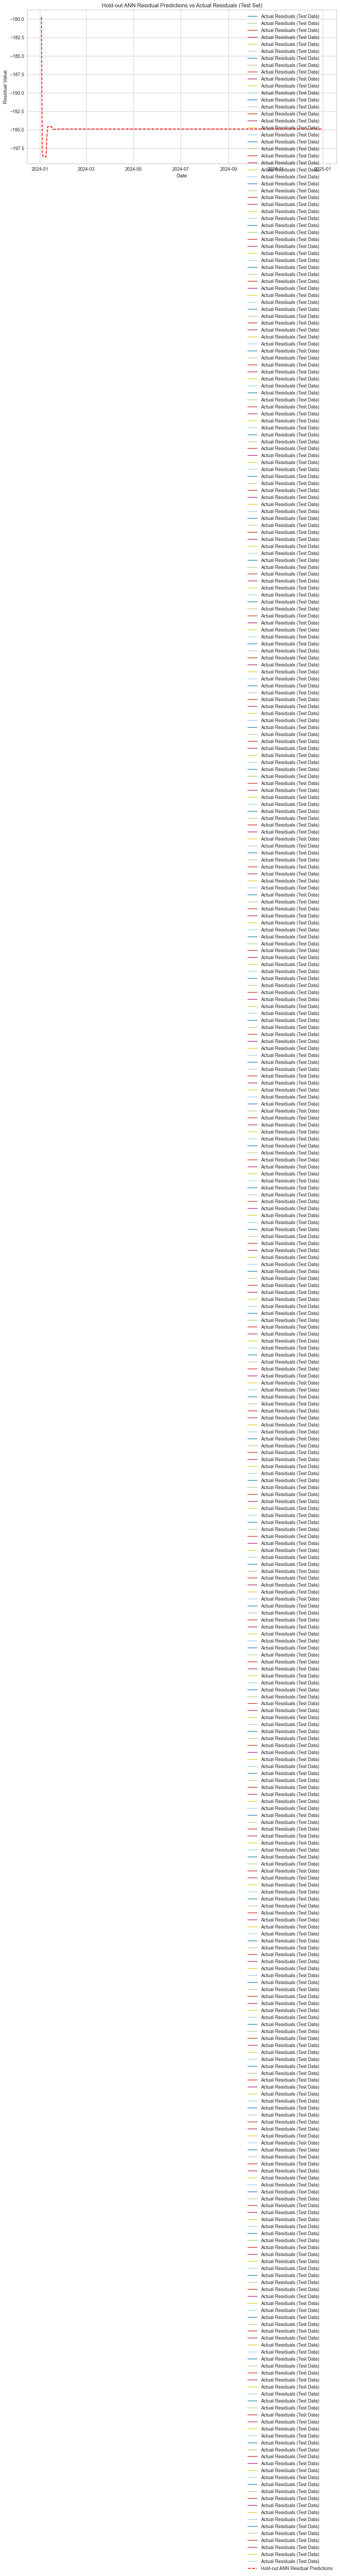

In [45]:
# 6. Plotting Hold-out ANN Residual Predictions vs Actual Residuals (Test Set) - Optional
plt.clf()  # <--- ADD THIS LINE TO CLEAR PREVIOUS PLOT
plt.figure(figsize=(12, 6))
plt.plot(exp_btc.get_config('y_test').index.to_timestamp(), exp_btc.get_config('y_test') - ets_predictions_holdout, label='Actual Residuals (Test Data)', alpha=0.7) # Actual test residuals (calculated)
plt.plot(ann_predictions_holdout_denormalized.index.to_timestamp(), ann_predictions_holdout_denormalized, label='Hold-out ANN Residual Predictions', linestyle='--', color='red') # ANN holdout predictions
plt.title('Hold-out ANN Residual Predictions vs Actual Residuals (Test Set)')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.legend()
plt.show()